 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace = True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum() 

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace = True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

sp500_history_df = pd.read_csv(sp500_history_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')

# Set close data type to float
sp500_history_df['Close'] = sp500_history_df['Close'].astype(float)

# Check 
sp500_history_df.dtypes

/Users/damienjennings/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_history_df = sp500_history_df.pct_change()
sp500_history_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_history_df = sp500_history_df.dropna()
sp500_history_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df = sp500_history_df.rename(columns = {'Close' : 'S&P 500'})
sp500_history_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([whale_df, algo_returns_df, sp500_history_df], axis = 'columns', join = 'inner')
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

Text(0.5, 1.0, 'Daily Returns')

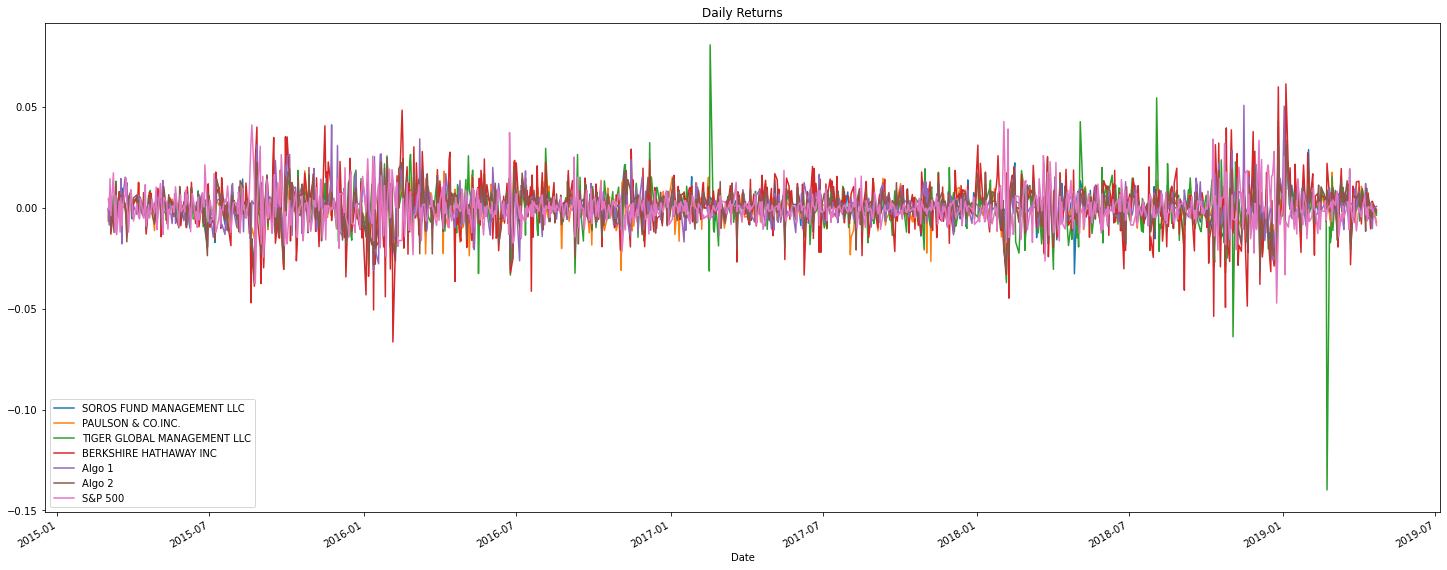

In [15]:
# Plot daily returns of all portfolios
plot = combined_data.plot(legend=True, figsize = (25,10))
plot.set_title('Daily Returns')

#### Calculate and Plot cumulative returns.

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-15                   1.157839            0.786506   
2019-04-16                   1.160965            0.786811   
2019-04-17                   1.157602            0.781723   
2019-04-18                   1.159278            0.782678   
2019-04-22                   1.156280            0.776939   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-15                     0.862797                1.525584  1.958591   
2019-04-16                     0.862080                1.526861  1.944990   
2019-04-17                     0.858279                1.531781  1.924954   
2019-04-18                     0.858778                1.534716  1.923823   
2019-04-22                     0.855652                1.533046  1.925124   

              Algo 2   S&P 500  

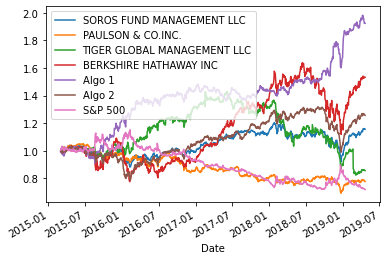

In [16]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns
cumulative_returns = (1 + combined_data).cumprod()
cumulative_returns.plot()
print(cumulative_returns.tail())

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


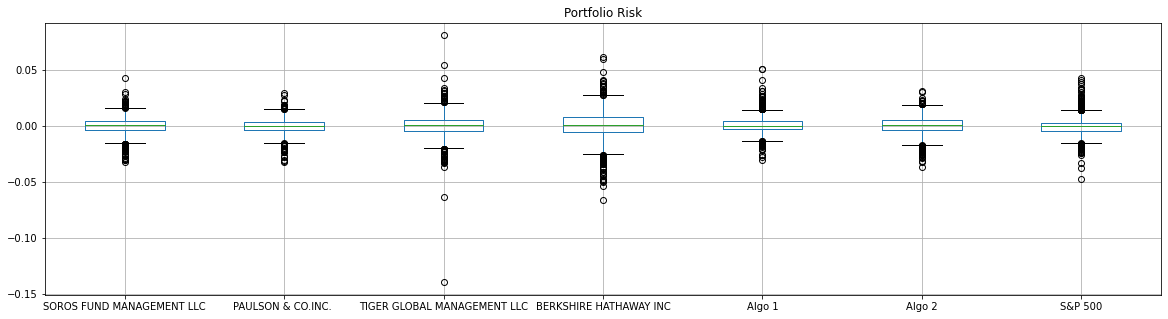

In [17]:
# Box plot to visually show risk
boxplot = combined_data.boxplot(figsize = (20, 5))
boxplot.set_title('Portfolio Risk')
boxplot

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
combined_data.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
standard_deviation = combined_data.std() 
risky = (standard_deviation > standard_deviation['S&P 500'])
standard_deviation['More Risky than S&P 500'] = risky
print(standard_deviation['More Risky than S&P 500'])

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviation = combined_data.std() * np.sqrt(252)
annualized_standard_deviation

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

Text(0.5, 1.0, '21 Day Rolling Statistics')

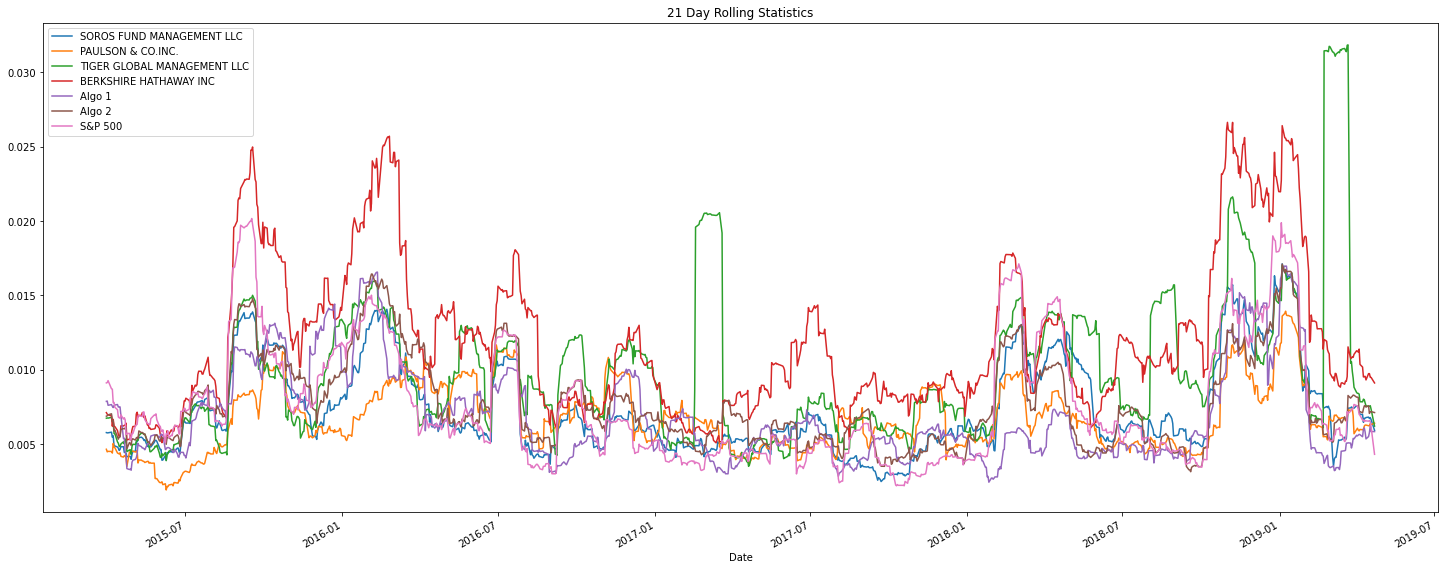

In [21]:
rolling_data = combined_data.rolling(21).std().plot(figsize = (25,10))
rolling_data.set_title('21 Day Rolling Statistics')

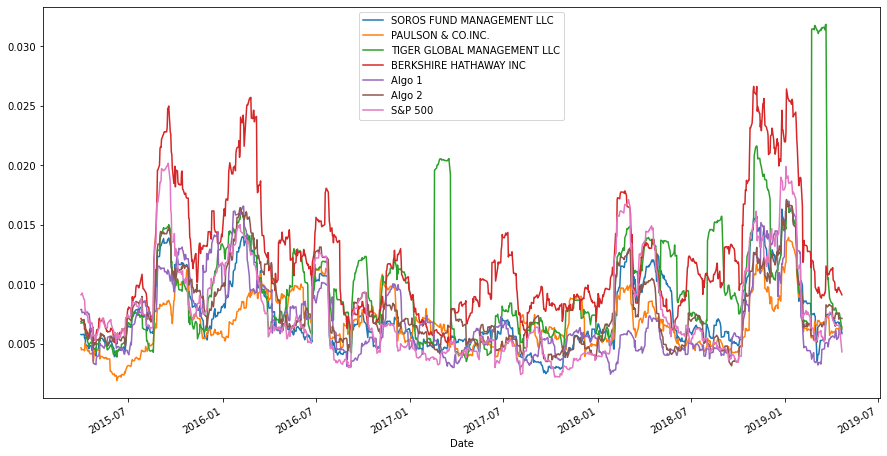

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_data.rolling(window=21).std().plot(figsize=(15,8))

### Calculate and plot the correlation

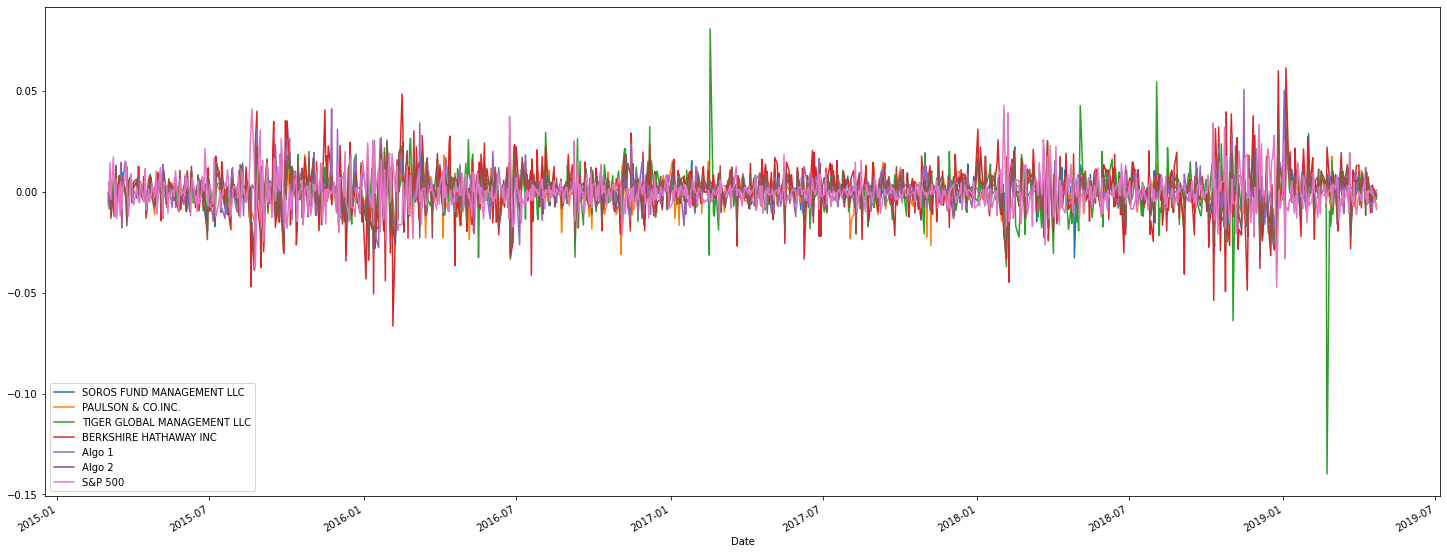

In [23]:
# Calculate the correlation
# Display de correlation matrix
correlation = combined_data.plot(figsize = (25,10))
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

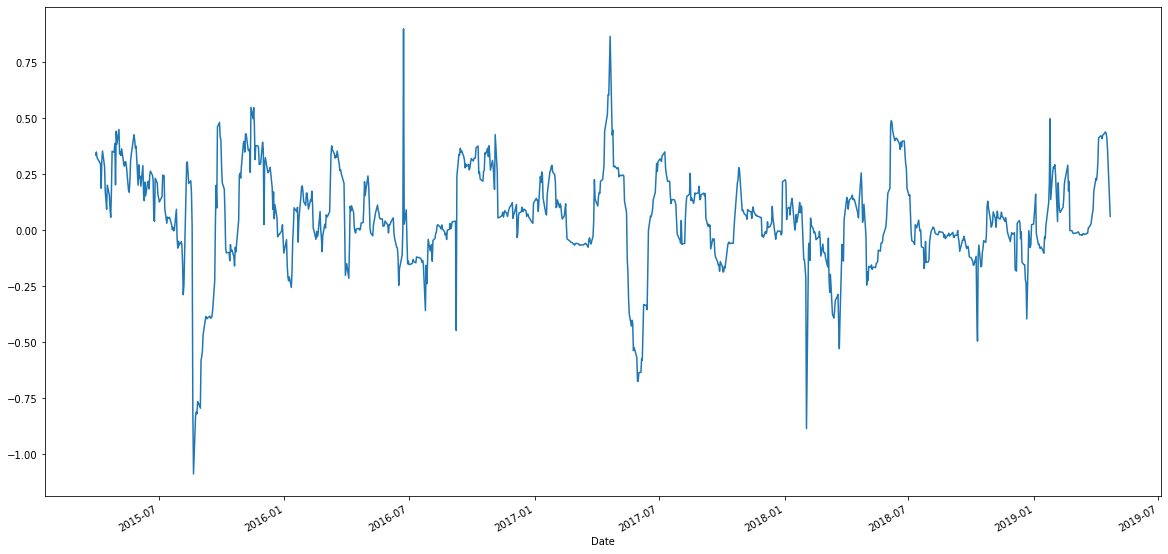

In [24]:
# Calculate covariance of a single portfolio
# Calculate variance of S&P 500
# Computing beta
# Plot beta trend
tiger_cov = combined_data['TIGER GLOBAL MANAGEMENT LLC'].rolling(21).cov(combined_data['S&P 500'])
tiger_var = combined_data['TIGER GLOBAL MANAGEMENT LLC'].rolling(21).var()
tiger_beta = tiger_cov / tiger_var
tiger_beta.plot(figsize = (20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [47]:
# Use `ewm` to calculate the rolling window
combined_data.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475
...,...,...,...,...,...,...,...
2019-04-15,0.007755,0.006960,0.016572,0.012136,0.006880,0.008065,0.007823
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007721
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007595


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [48]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_data.mean() * 252) / annualized_standard_deviation
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

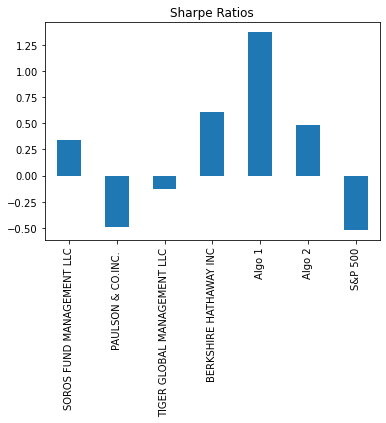

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [44]:
#Yes

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [29]:
# Reading data from 1st stock
goog_csv = Path("goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename( columns={"Symbol": "GOOG1","NOCP":"GOOG"},inplace = True )
goog_df.drop(columns=['GOOG1'], axis=1, inplace = True)

In [30]:
# Reading data from 2nd stock
aapl_csv = Path("aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename( columns={"Symbol": "AAPL1","NOCP":"AAPL"},inplace = True )
aapl_df.drop(columns=['AAPL1'], axis=1, inplace= True)

In [31]:
# Reading data from 3rd stock
cost_csv = Path("cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename( columns={"Symbol": "COST1","NOCP":"COST"},inplace = True )
cost_df.drop(columns=['COST1'], axis=1,inplace = True)

In [32]:
# Combine all stocks in a single DataFrame
combined_pt2 = pd.concat([goog_df,aapl_df,cost_df], axis='columns', join='inner')
combined_pt2.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [33]:
# Reset Date index
combined_pt2.reset_index(drop=True)

,GOOG,AAPL,COST
0,1162.38,200.72,243.47
1,1166.27,202.90,241.34
2,1174.10,202.86,240.18
3,1189.39,208.48,244.23
4,1185.40,211.75,244.62
...,...,...,...
245,1078.59,186.99,199.60
246,1081.77,188.18,198.71
247,1079.23,186.44,195.48
248,1100.20,188.15,195.88


In [34]:
# Reorganize portfolio data by having a column per symbol
combined_pt2 = pd.concat([goog_df,aapl_df,cost_df], axis='columns', join='inner')
combined_pt2.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [35]:
# Calculate daily returns
daily_returns = combined_pt2.pct_change(1)
# Drop NAs
combined_pt2.dropna()
# Display sample data
combined_pt2.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
# Calculate portfolio return
# Display sample data
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)
custom = pd.DataFrame(portfolio_returns)
custom.head()

,0
Trade DATE,
2019-05-09,NaN
2019-05-08,0.001820
2019-05-07,0.000570
2019-05-06,0.019196
2019-05-03,0.004642


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_pt3 = pd.concat([portfolio_returns, combined_data], axis='columns', join='inner')
combined_pt3.rename(columns= {0: "Custom"},inplace = True )
combined_pt3.dropna(inplace=True)
combined_pt3.sort_index()
combined_pt3.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
combined_pt3.std()
annualized_variance_pt2 = (combined_pt3.var()*252)
annualized_std_pt2 = np.sqrt(annualized_variance_pt2)
annualized_std_pt2

Custom                         0.213137
SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
S&P 500                        0.152147
dtype: float64

### Calculate and plot rolling `std` with 21-day window

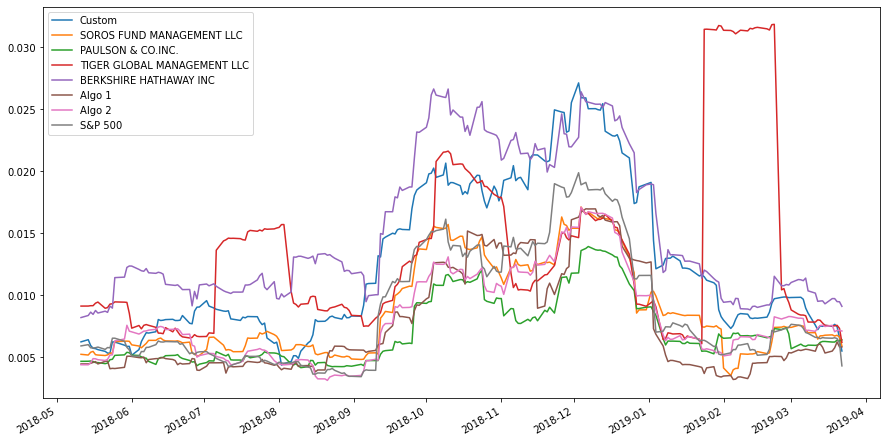

In [39]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_pt3.rolling(window=21).std().plot(figsize=(15,8))

### Calculate and plot the correlation

In [40]:
# Calculate and plot the correlation
combined_correlation = combined_pt3.corr()
combined_correlation.plot

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

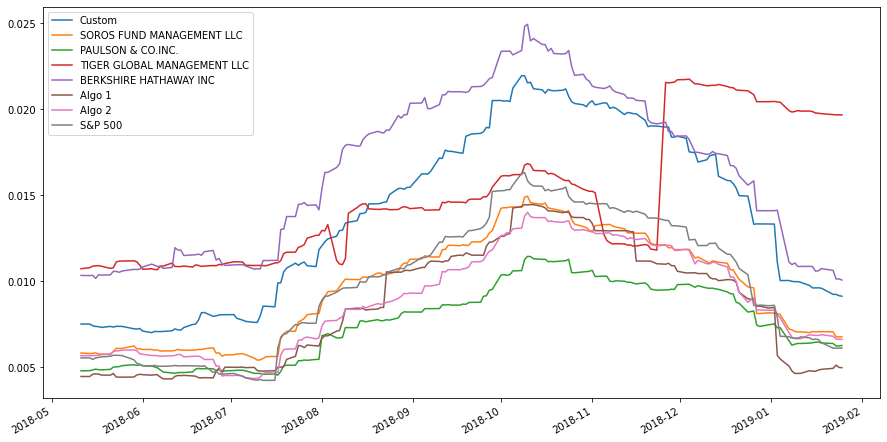

In [41]:
# Calculate and plot Beta
combined_rolling = combined_pt3.rolling(window=60).std().plot(figsize=(15,8))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Calculate Annualzied Sharpe Ratios
combined_sharpe_ratios = (combined_pt3.mean() * 252) / (combined_pt3.std() * np.sqrt(252))

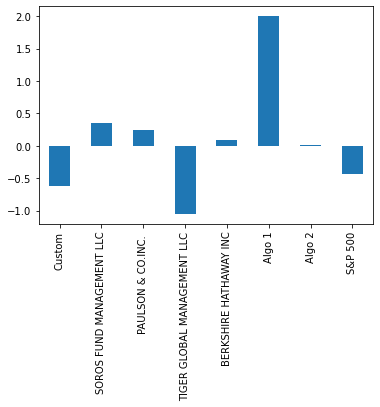

In [54]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind = 'bar')